In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("Fraud_check.csv")

In [41]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [43]:
#df.drop('Marital.Status',axis=1, inplace=True)
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [5]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,68833,50047,10,YES
1,YES,33700,134075,18,YES
2,NO,36925,160205,30,YES
3,YES,50190,193264,15,YES
4,NO,81002,27533,28,NO


In [6]:
df.isna().sum()

Undergrad          0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.isna().sum()

Undergrad          0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,1
1,YES,Divorced,33700,134075,18,1


In [44]:
df['Urban'] = df['Urban'].apply(lambda x: 1 if x=='YES' else 0)

In [46]:
df['Marital.Status'] = df['Marital.Status'].map({'Single':1, 'Married':2, 'Divorced':3})

In [47]:
df['Undergrad'] = df['Undergrad'].apply(lambda x: 1 if x=='YES' else 0)

<AxesSubplot:>

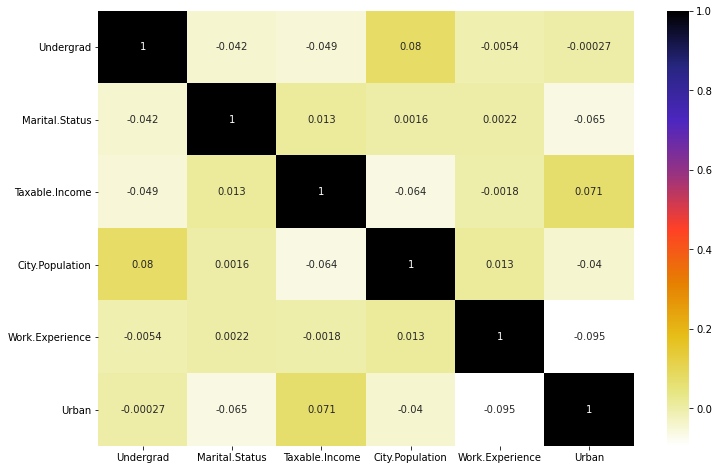

In [49]:
## Find the high correlated Values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [50]:
## find the feature engineering correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if (corr_matrix.iloc[i,j])>threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [62]:
corr = correlation(df, 0.5)
len(corr)
##no highly correlation value found

0

In [63]:
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,3,33700,134075,18,1


In [80]:
df.Undergrad.value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

## Visualization 

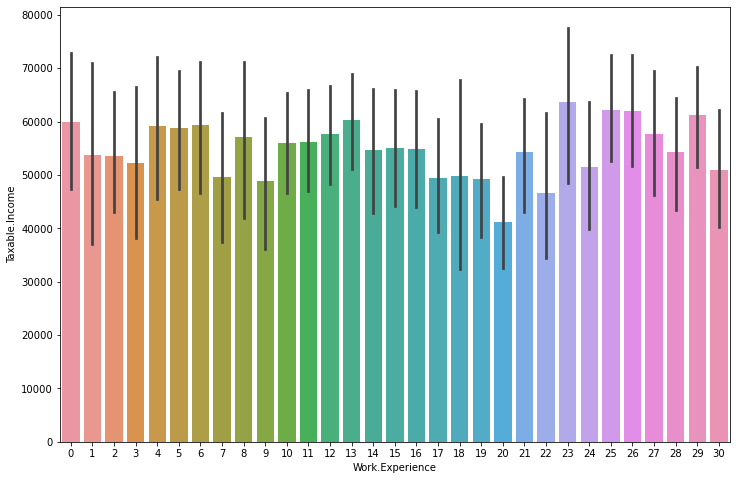

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(x='Work.Experience', y= 'Taxable.Income', data = df)
plt.show()

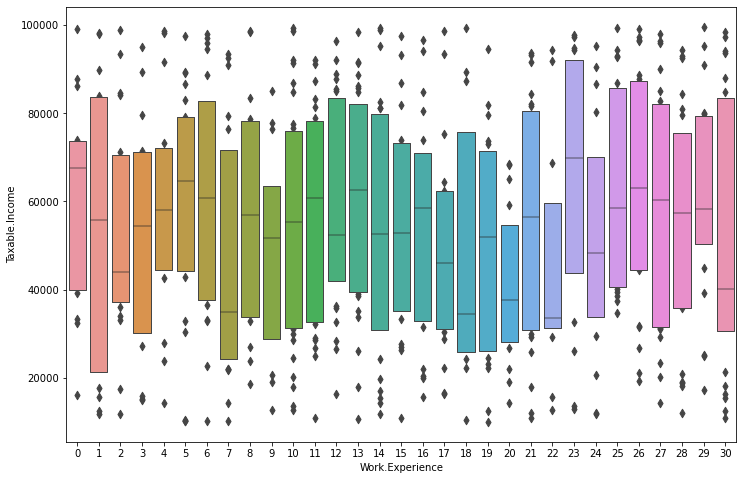

In [67]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='Work.Experience', y= 'Taxable.Income', data = df)
plt.show()

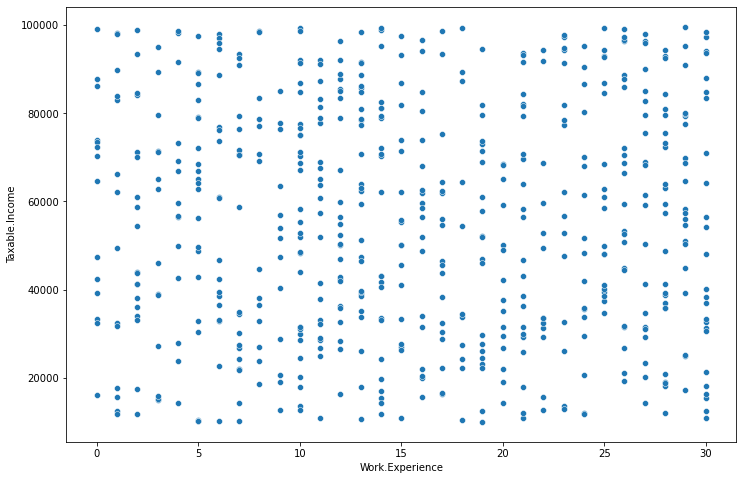

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Work.Experience', y= 'Taxable.Income', data = df)
plt.show()

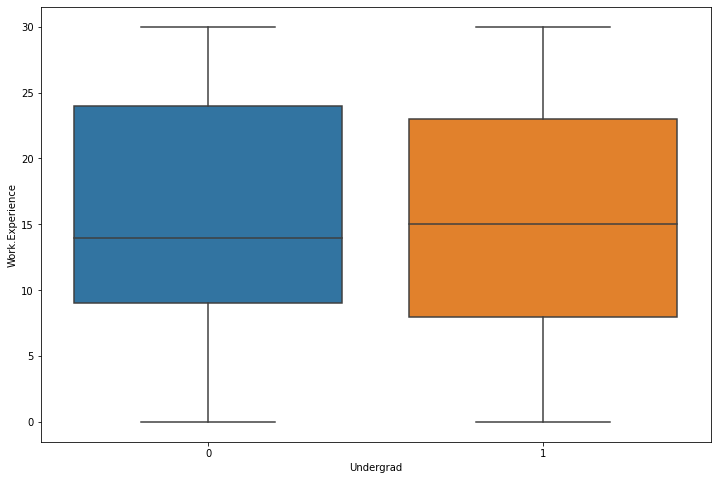

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Undergrad', y='Work.Experience' , data = df)
plt.show()

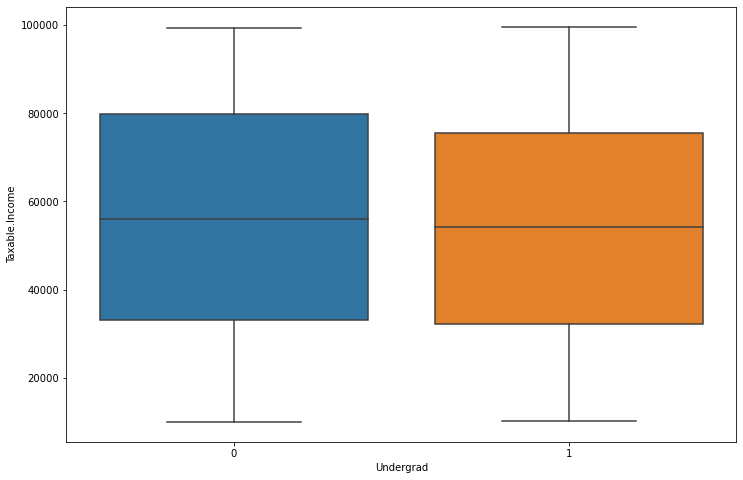

In [82]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Undergrad', y='Taxable.Income' , data = df)
plt.show()



<Figure size 864x576 with 0 Axes>

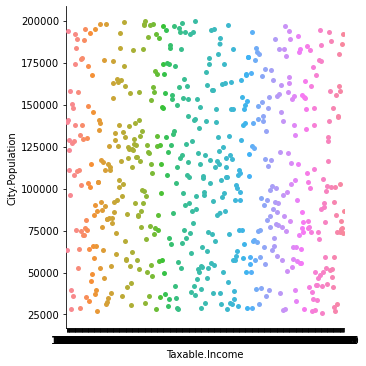

In [90]:
plt.figure(figsize=(12,8))
sns.catplot(x='Taxable.Income', y= 'City.Population', data = df)
plt.show()


In [48]:
df[:4]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,68833,50047,10,1
1,1,3,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1


In [11]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x >30000 else 'Good')

In [12]:
df[:2]

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Risky,50047,10,1
1,1,Risky,134075,18,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Taxable.Income   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 23.6+ KB


In [14]:
df.describe()

,Undergrad,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000
mean,0.520000,108747.368333,15.558333,0.503333
std,0.500017,49850.075134,8.842147,0.500406
min,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,66966.750000,8.000000,0.000000
50%,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,150114.250000,24.000000,1.000000
max,1.000000,199778.000000,30.000000,1.000000


## Perform Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
## Train Test split
train = df.drop('Taxable.Income',axis=1)
test = df['Taxable.Income']

In [17]:
train[:3]

,Undergrad,City.Population,Work.Experience,Urban
0,0,50047,10,1
1,1,134075,18,1
2,0,160205,30,1


In [18]:
test[:4]

0    Risky
1    Risky
2    Risky
3    Risky
Name: Taxable.Income, dtype: object

In [19]:
col = train.columns
col

Index(['Undergrad', 'City.Population', 'Work.Experience', 'Urban'], dtype='object')

In [20]:
scaler = StandardScaler()

In [21]:
scal_data = scaler.fit_transform(train)

In [22]:
train = pd.DataFrame(scal_data, columns=col)

In [23]:
train[:4]

,Undergrad,City.Population,Work.Experience,Urban
0,-1.040833,-1.178521,-0.629143,0.993355
1,0.960769,0.508500,0.276370,0.993355
2,-1.040833,1.033109,1.634639,0.993355
3,0.960769,1.696831,-0.063197,0.993355


In [24]:
test[:4]

0    Risky
1    Risky
2    Risky
3    Risky
Name: Taxable.Income, dtype: object

## split data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.25)

In [27]:
X_train[:4]

,Undergrad,City.Population,Work.Experience,Urban
172,-1.040833,-1.122868,0.842315,0.993355
359,0.960769,0.974766,-0.515953,-1.006689
557,0.960769,0.977215,-0.629143,-1.006689
306,0.960769,1.532903,-0.402764,-1.006689


In [28]:
test[:4]

0    Risky
1    Risky
2    Risky
3    Risky
Name: Taxable.Income, dtype: object

## Build the Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
pred = model.predict(X_test)

In [33]:
pred[:5]

array(['Good', 'Risky', 'Risky', 'Risky', 'Risky'], dtype=object)

In [34]:
y_test[:4]

229    Risky
143     Good
66     Risky
142    Risky
Name: Taxable.Income, dtype: object

## Find the Accuracy 

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
score = accuracy_score(y_test, pred)

In [37]:
score

0.6625